'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


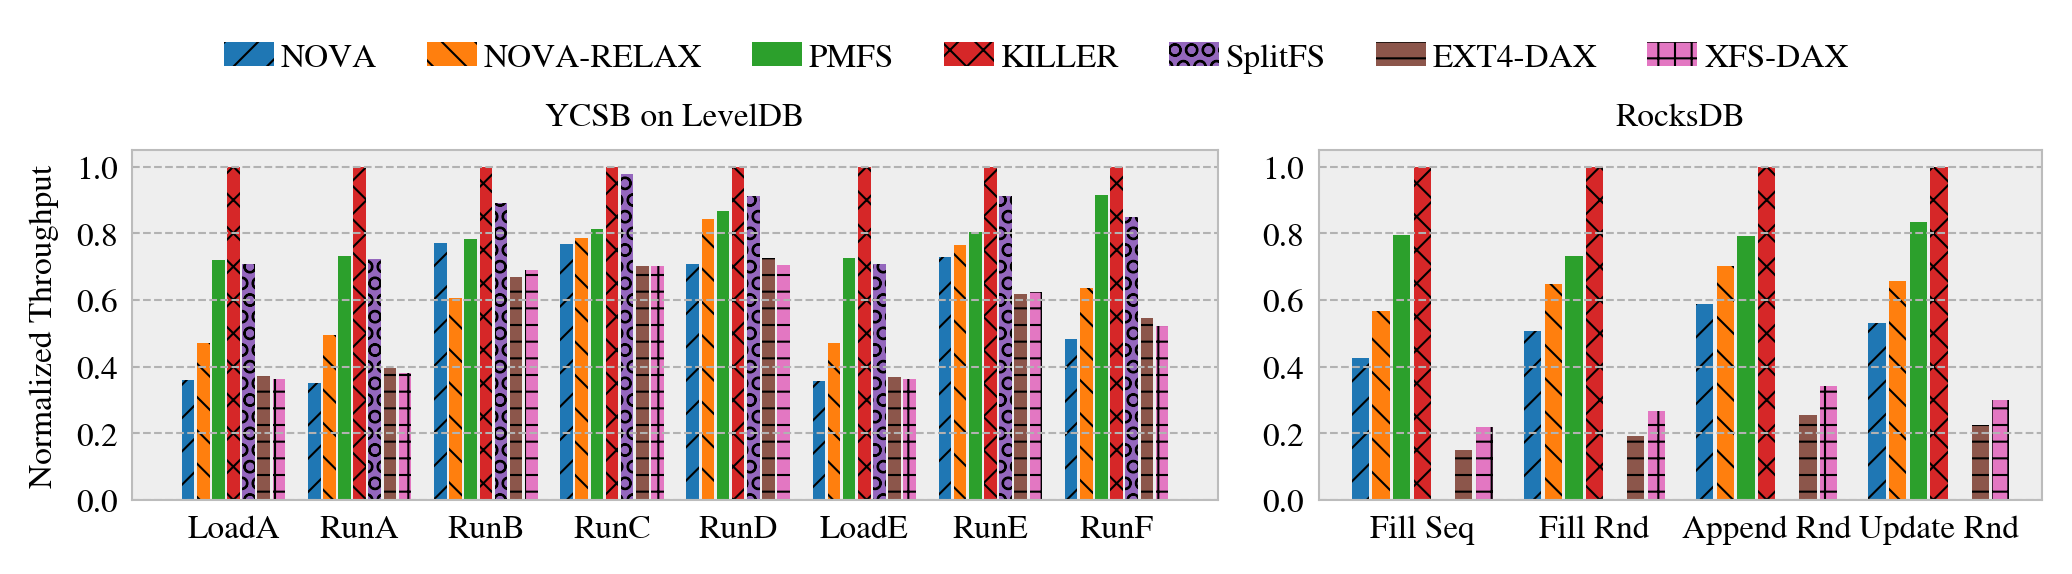

In [2]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams['grid.linestyle'] = "--"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-rocksdb", "r") as f:
    df_rdb = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4.5)))
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[3, 2])

bar_width = 0.12
true_bar_width = 0.1
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
workloads = [ "loada(micros/op)", "runa(micros/op)", "runb(micros/op)", "runc(micros/op)", "rund(micros/op)", "loade(micros/op)", "rune(micros/op)", "runf(micros/op)" ]
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
workloads_name_remap = ["LoadA", "RunA", "RunB", "RunC", "RunD", "LoadE", "RunE", "RunF"]
tot = len(fss) * bar_width
cmap = "tab10"
x = list(range(1, len(workloads) + 1))
# num_threads = [1]
# for thread in num_threads:
for workload in workloads:
    value = df[workload] / df[workload].min()
    df[workload] = value

# for fig_idx in range(0, len(num_threads)):
# subfig = plt.subplot(1, 1, 1)
subfig = plt.subplot(gs[0, 0])
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    bws = []
    for workload in workloads:
        bws.append(1 / df[(df['file_system'] == fs)][workload].iloc[0])
    
    plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    # Draw title
    plt.xticks(x, labels=workloads_name_remap, fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    # if fig_idx == 0:
    plt.ylabel('Normalized Throughput', fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
plt.title("YCSB on LevelDB", fontsize=8)
legend_labels = fss
fss.replace("SplitFS-YCSB", "SplitFS", inplace=True)
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=7, fontsize=8, frameon=False, columnspacing=1.5, handletextpad=0.2, handlelength=1.5)

df = df_rdb
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
workloads = [ "fill_seq(MB/s)", "fillrandom(MB/s)", "appendrandom(MB/s)", "updaterandom(MB/s)" ]
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
workloads_name_remap = ["Fill Seq", "Fill Rnd", "Append Rnd", "Update Rnd" ]
tot = len(fss) * bar_width
cmap = "tab10"
x = list(range(1, len(workloads) + 1))
# num_threads = [1]
# for thread in num_threads:
for workload in workloads:
    value = df[workload] / df[workload].max()
    df[workload] = value

# for fig_idx in range(0, len(num_threads)):
# subfig = plt.subplot(1, 1, 1)
subfig = plt.subplot(gs[0, 1])
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    bws = []
    for workload in workloads:
        bws.append(df[(df['file_system'] == fs)][workload].iloc[0])
    
    plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    # Draw title
    plt.xticks(x, labels=workloads_name_remap, fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    # if fig_idx == 0:
    # plt.ylabel('Normalized Throughput', fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
plt.title("RocksDB", fontsize=8)

plt.tight_layout()
plt.savefig("./FIG-RealWorld.pdf", bbox_inches='tight', pad_inches=0)
